In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import surface_amplitudes as sf
from modules import globals
import pandas as pd
import numpy as np
import os
import glob
indices = None
surface_tension_dict = {}

For reference with integration method the following surface tensions were computed

$z_1$: $\alpha_{o-o} / T^3(\beta=10.85) = 1.2316804724774406$

$z_2$: $\alpha_{o-o} / T^3(\beta=10.85) = 1.5433288477348852$

# Load data

In [2]:
folders = utility.list_all_folders(globals.data_path,"60-60-86-6")

../data/output-measure-surface/su4-60-60-86-6/beta-10.80-twist-1-60-60-86-6 , index: 0
../data/output-measure-surface/su4-60-60-86-6/beta-10.80-twist-2-60-60-86-6 , index: 1
../data/output-measure-surface/su4-60-60-86-6/beta-10.82-twist-1-60-60-86-6 , index: 2
../data/output-measure-surface/su4-60-60-86-6/beta-10.82-twist-2-60-60-86-6 , index: 3
../data/output-measure-surface/su4-60-60-86-6/beta-10.83-twist-1-60-60-86-6 , index: 4
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-1-60-60-86-6 , index: 5
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-1-wrap-fix , index: 6
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-2-60-60-86-6 , index: 7
../data/output-measure-surface/su4-60-60-86-6/beta-10.95-twist-1-60-60-86-6 , index: 8
../data/output-measure-surface/su4-60-60-86-6/beta-10.95-twist-2-60-60-86-6 , index: 9
../data/output-measure-surface/su4-60-60-86-6/beta-11.5-twist-1-60-60-86-6 , index: 10
../data/output-measure-surface/su4-60-60-86-6

In [12]:
choose_folder = 13
fourier_profiles = {}
folder = folders[choose_folder]
files = glob.glob(os.path.join(folder, "fourier_profile_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, modes, fourier_profile = read_and_write.read_fourier_profile(folder,file_name=file_name)
    fourier_profiles[smearing_level] = fourier_profile
fourier_profiles = dict(sorted(fourier_profiles.items(), key=lambda item: int(item[0])))
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['60', '60', '86', '6'], $\beta=$ 12, twist coeff $=$ 2

## Perform post processing

In [13]:
f_n_list = []
errors_list = []
for smearing_level, profile in fourier_profiles.items():
    if indices is not None:
        sample_size = len(profile)
        indices_set = indices[smearing_level]
        profile = np.delete(profile, list(indices_set), axis=0)
        print(f"Dropped {sample_size-len(profile)} samples")
    f_n, errors = utility.compute_with_aa_jackknife_fourier(profile, 10, thermalization=1000)
    f_n_list.append(f_n)
    errors_list.append(errors)



## Plot Fourier modes for different smearing steps

|   smearing | Linear fit ($\sigma / T^3$)   |
|-----------:|:------------------------------|
|         10 | 7.706 $\pm$ 0.2733            |
|         20 | 7.821 $\pm$ 0.2753            |
|         30 | 7.985 $\pm$ 0.2902            |
|         40 | 8.209 $\pm$ 0.3196            |
|         50 | 8.502 $\pm$ 0.3663            |
|         60 | 8.868 $\pm$ 0.4302            |

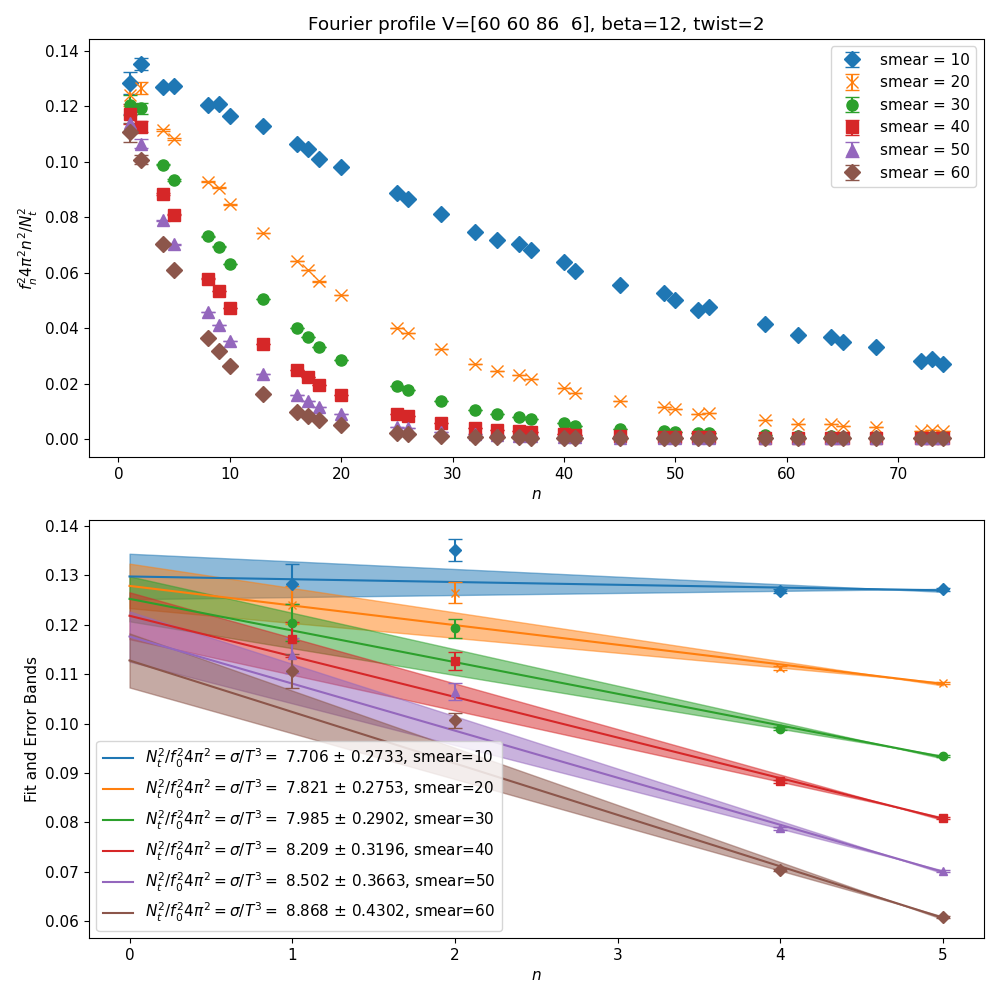

In [14]:
%matplotlib widget
smearing_levels = list(fourier_profiles.keys())
show_plot = True
twist = folder.split("/")[4].split('-')[3]
temp = folder.split("/")[4].split('-')[1]
data = {
    "smearing": smearing_levels,
    "linear": [
        fourier_surface.compute_fourier_profile(
            modes, f_n, volume, errors=error, beta=temp, twist=twist, fit_range=4, smearing=smear, show_plot=show_plot
        ) for f_n, error, smear in zip( f_n_list, errors_list, smearing_levels)
    ]
    # "exponential": [
    #     fourier_surface.compute_fourier_profile_exponential_fit(
    #         n_2, f_n, volume, errors=error, beta=10.85, smearing=smear, show_plot=show_plot
    #     ) for n_2, f_n, error, smear in zip(n_2_list, f_n_list, errors_list, smearing_levels)
    # ]
}
surface_tension_dict[folder.split("/")[-1]] = data
df = pd.DataFrame(data)
utility.print_df_as_markdown_fourier_modes(df)
fourier_surface.global_fig = None

In [15]:
surface_tension_dict.keys()

dict_keys(['beta-10.95-twist-1-60-60-86-6', 'beta-10.95-twist-2-60-60-86-6', 'beta-12-twist-1-60-60-86-6', 'beta-12-twist-2-60-60-86-6'])

In [96]:
utility.update_surface_tension_dict(surface_tension_dict)